# TP2- Ejercicio 2

Según el enunciado, si en el instante de tiempo discreto $t_{i}$ hay $k$ solicitudes pendientes a ser procesadas en el servidor, entonces en el instante $t_{i+1}$ puede agregarse una nueva solicitud con probabilidad $p = \frac{1}{40}$ y puede resolverse una solicitud con probabilidad $q = \frac{1}{30}$. Suponiendo que los eventos P y Q con probabilidad p y q respectivamente son independientes, luego de cada instante de tiempo pueden suceder 4 situaciones: P y Q; P' Y Q; P y Q', P' Y Q'.
Dado que los eventos son independientes, la probabilidad de que suceda cada una de estas situaciones se puede calcular como el producto de las probabilidades. Luego, 

Prob(P y Q) = $\frac{1}{40} . \frac{1}{30} = \frac{1}{1200}$

Prob(P' y Q) = $\frac{39}{40} . \frac{1}{30} = \frac{39}{1200}$

Prob(P y Q') = $\frac{1}{40} . \frac{29}{30} = \frac{29}{1200}$

Prob(P' y Q') = $\frac{39}{40} . \frac{29}{30} = \frac{1131}{1200}$

Ademas, los eventos: 

                     P y Q implican que en el instante $t_{i+1}$ haya $k$ solicitudes

                     P' y Q implican que en el instante $t_{i+1}$ haya $k-1$ solicitudes

                     P y Q' implican que en el instante $t_{i+1}$ haya $k+1$ solicitudes                 
    
                     P' y Q' implican que en el instante $t_{i+1}$ haya $k$ solicitudes
                     

Luego, la matriz de transiciones sera una matriz de dimensiones infinitas mayormente con ceros, a excepecion de la diagonal que tendra como valor Prob((P y Q)U(P' y Q')) = $\frac{1132}{1200}$; la diagonal inferior a la principal que tendra valor Prob(P' y Q) = $\frac{39}{1200}$ y la diagonal superior a la principal que tendra valor Prob(P y Q') = $\frac{29}{1200}$. La primera fila, sin embargo sera distinta ya que no existe la posibilidad de que se resuelva una solicitud si no hay ninguna en la cola. Por lo tanto tendra los valores de Q' y Q respectivamente. 


A = \begin{pmatrix}
    \frac{29}{30} & \frac{1}{30} & 0 & 0 & 0 & ... \\
    \frac{39}{1200} & \frac{1132}{1200} & \frac{29}{1200} & 0 & 0 & ... \\
    0 & \frac{39}{1200} & \frac{1132}{1200} & \frac{29}{1200} & 0 & 0 & ... \\
    0 & 0 & \frac{39}{1200} & \frac{1132}{1200} & \frac{29}{1200} & 0 & 0 & ... \\
    0 & 0 & 0 & \frac{39}{1200} & \frac{1132}{1200} & \frac{29}{1200} & 0 & 0 & ... \\
    .\\
    .\\
    .\\
    \end{pmatrix}

b. Utilizando Matlab, Octave o Python simule la evolución del sistema a lo largo de 1.000 segundos suponiendo que el servidor comienza sin estar procesando solicitudes.

In [1]:
import numpy as np
from numpy.random import RandomState
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
# Constantes
SEGUNDOS = 1000
INTERVALO = 0.01
ESTADOS = ['0', '1']

# n el numero de intervalos de tiempo. 1000 s / 0.01 s = 100000 intervalos
n = int(SEGUNDOS / INTERVALO)

In [3]:
estados = np.zeros(n)

# Estado (inicial) del sistema
estados[0] = 0
random_state = RandomState(5)

for i in range(n-1):
    
    if (estados[i] == 0):
        estados[i+1] = random_state.choice(2,1, p=[29/30, 1/30])
    else:
        estados[i+1] = estados[i] + random_state.choice(3,1, p=[39/1200, 1132/1200, 29/1200]) - 1 
                       

Text(0.5, 1.0, 'Simulacion de una evolucion de la cantidad de solicitudes pendientes')

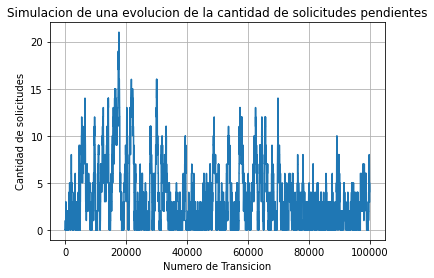

In [4]:
x = np.arange(n)
plt.plot(x, estados)
plt.xlabel('Numero de Transicion')
plt.ylabel('Cantidad de solicitudes')
plt.grid()
plt.title('Simulacion de una evolucion de la cantidad de solicitudes pendientes')

d. Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado.

Text(0.5, 1.0, 'Histograma de la frecuencia de la cantidad de solicitudes en la cola')

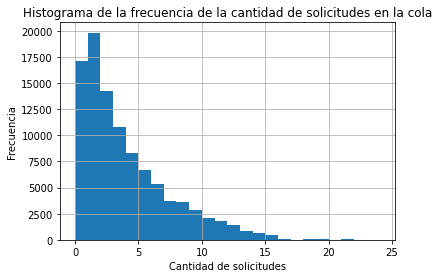

In [5]:
plt.hist(estados, bins=np.arange(25))
plt.xlabel('Cantidad de solicitudes')
plt.ylabel('Frecuencia')
plt.grid()
plt.title('Histograma de la frecuencia de la cantidad de solicitudes en la cola')

e. Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes.

In [6]:
print("El porcentaje de tiempo que el home banking no tuvo clientes conectados fue del {:.3f} %".format(np.sum(np.asarray(estados == 0) * 100 / n)))

El porcentaje de tiempo que el home banking no tuvo clientes conectados fue del 17.144 %
